Напишіть функцію гіпотези лінійної регресії у векторному вигляді

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def h(X, w):
    return X.dot(w).to_numpy()

Створіть функцію для обчислення функції втрат у векторному вигляді

In [2]:
def loss_func(X, y, w):
    return np.sum(np.square(h(X, w) - y)) / (2 * X.shape[0])

Реалізуйте один крок градієнтного спуску

In [3]:
def grad_w(X, y, w):
    return 2 / X.shape[0] * X.T.dot(h(X, w) - y)


def grad_step(gradient, learning_rate=0.01):
    return learning_rate * gradient


def grad_descent(X, y, num_iter=1000, epsilon=1e-10):

    weights = np.zeros(X.shape[1])
    loss_history = []
    y = y.to_numpy()

    for epoch in range(num_iter):

        loss = loss_func(X, y, weights)
        loss_history.append(loss)

        gradient = grad_w(X, y, weights)
        weights -= grad_step(gradient)

        if (epoch + 1) % 100 == 0:
            print(f"Epoch {epoch + 1}/{num_iter}, mse: {loss}")
        if loss < epsilon:
            print(f"Converged. Epoch {epoch + 1}, Final MSE: {loss}")
            break

    return weights, loss_history

Знайдіть найкращі параметри $w$ для датасету прогнозуючу ціну на будинок залежно від площі, кількості ванних кімнат та кількості спалень

In [4]:
df = pd.read_csv("Housing.csv")

X = df[["area", "bathrooms", "bathrooms"]]
y = df["price"]

def normalize(data):
    return (data - np.mean(data, axis=0)) / np.std(data, axis=0)

X_norm = normalize(X)
y_norm = normalize(y)

weights, loss_history = grad_descent(X_norm, y_norm)
weights

Epoch 100/1000, mse: 0.26898741344177757
Epoch 200/1000, mse: 0.26749215195049025
Epoch 300/1000, mse: 0.26745805248316873
Epoch 400/1000, mse: 0.2674572540980198
Epoch 500/1000, mse: 0.26745723540056826
Epoch 600/1000, mse: 0.26745723496269
Epoch 700/1000, mse: 0.2674572349524353
Epoch 800/1000, mse: 0.26745723495219514
Epoch 900/1000, mse: 0.26745723495218954
Epoch 1000/1000, mse: 0.26745723495218937


area         0.452693
bathrooms    0.214902
bathrooms    0.214902
dtype: float64

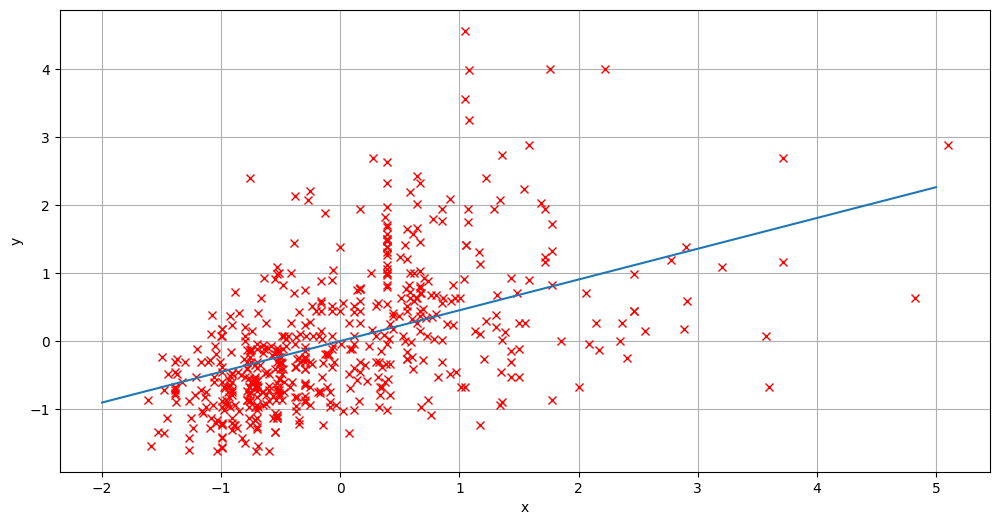

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(X_norm.area, y_norm, "rx")
x = np.linspace(-2, 5, 500)
plt.plot(x, weights.iloc[0] * x)
plt.xlabel("x")
plt.ylabel("y")
plt.grid()

Знайдіть ці ж параметри за допомогою аналітичного рішення

In [6]:
ones = np.ones((X.shape[0], 1))
X = np.hstack((ones, X))
w_analytical = np.linalg.pinv(X.T @ X) @ X.T @ y
print("Analytical Solution - Optimal w:", w_analytical)

Analytical Solution - Optimal w: [6.99206733e+05 3.90174907e+02 7.99972359e+05 7.99972359e+05]


Порівняйте отримані результати

In [7]:
# pd.concat([weights, analytical_weights] , axis = 1)